<h1 style="line-height: 14px;">Trees of downtown Austin</h1>
<h3 style="line-height: 18px; margin: 0px;">A silly illustrated guide</h3>

Tal Yarkoni (<a href="mailto:tyarkoni@gmail.com">Email</a> | <a href="http://talyarkoni.org">Web</a> | <a href="http://twitter.com/talyarkoni">Twitter</a> | <a href="http://github.com/tyarkoni">GitHub</a>), October 2015


I like trees. A lot. When walking around town here in Austin, I often find myself thinking, "oh, that's a nice tree. I wonder what kind of tree that is."

Unfortunately, I don't know anything about trees, so my arboreal curiosity usually goes unsatisfied. I've attempted to solve the problem by trying to learn what the most common trees in central Texas look like... but either my visual memory is terrifically bad, or there are a lot of confusingly similar-looking tree species that grow in these parts.

Hey, you know what would solve my problem? A map. And not just any map; specifically, a map containing all of the trees in Austin, conveniently coded by location and species. If I had a map like that, every time I walked by a particularly impressive pecan or live oak specimen, I could just spend thirty or so seconds of my life looking the tree up. Then I could go on my way thinking, "oh, it's a bald cypress; that's good to know." And life would be *amazing*.

Unfortunately, that's just crazy talk. Ain't nobody got time to walk around all day just documenting the locations and identities of all the trees in Austin. I mean, it would be nice if there were someone out there whose job it was to do that kind of thing. But that's just wishful thinking... right?

Hah! Shows what you know. It's not wishful thinking at all! It's a factually accurate description of the current state of affairs. You think you're so smart, don't you? Yet somehow, you've managed to spend mmmmhhrmmrhrmrmmrrhmty years living in Austin in blissful ignorance of the single most important position in the municipal government. I refer, of course, to the (in)famous <a href="https://austintexas.gov/department/city-arborist">City Arborist</a>.

The City Arborist is basically a person (I guess it might even be more than one person; I'm not very good at knowing things) whose entire job is to think about trees in cities. Imagine that! It's like the perfect job. It's probably the job you would have, if you weren't too lazy to spend time doing the things you love.

Okay, let's not get too existential and depressing here. The point is, there is this entire department at the City of Austin whose job is apparently (among other things) to produce data that look like this next thing here...

In [1]:
import pandas as pd
trees = pd.read_csv('Downtown_Tree_Inventory_2013.csv')
trees.head()

,TREE_ID,OBJECTID,ADDRESS,SPECIES,COM_NAME,DBH,HEIGHT,CONDITION,LAND_TYPE,PARK_NAME,X,Y
0,7,1,1201 RED RIVER ST,Quercus fusiformis,Escarpment Live Oak,27,27,Poor,Park,Waterloo Neighborhood Park,3116131.02598,10072645.3270
1,63,2,1201 RED RIVER ST,Ulmus americana,American Elm,22,8,Fair,Park,Waterloo Neighborhood Park,3116227.97821,10072923.9685
2,82,3,1201 RED RIVER ST,Quercus fusiformis,Escarpment Live Oak,34,30,Poor,Park,Waterloo Neighborhood Park,3116226.42670,10072723.5907
3,93,4,1201 RED RIVER ST,Carya illinoinensis,Pecan,30,8,Poor,Park,Waterloo Neighborhood Park,3116310.15587,10072891.5405
4,94,5,1201 RED RIVER ST,Quercus virginiana,Southern Live Oak,20,8,Fair,Park,Waterloo Neighborhood Park,3116359.91200,10072813.4274


**OMG it's tree data!** For Austin! Granted, it's only tree data for *downtown* Austin. I guess there are just too many damn trees outside downtown to count. But since I live downtown, I shouldn't complain. The important thing is that, thanks to the City Arborist and the [City of Austin's Open Data Portal](https://data.austintexas.gov/), I'm in an excellent position to scratch my tree-identifying itch. With a little help from Python, of course... because Python is *amazing* at scratching itches.

What follows is a brief data description and visualization tour of the City of Austin's [2013 downtown tree inventory](https://data.austintexas.gov/Environmental/Downtown-Tree-Inventory-2013/auyh-v9m2). We start by answering trivial questions like "how many trees are there in downtown Austin?", and then move on to generating some pretty-looking maps of trees. Actually, they're not really that pretty. And the code is also not very well commented, because I'm kind of lazy. But don't worry---I'll do my best to distract you with bad jokes, so that by the time the end of the tour rolls around, you won't notice that you've learned almost nothing.

Anyway, without further ado...

## How many trees are there in downtown Austin?

This one's pretty easy to answer:

In [2]:
# Downtown Austin has dis many trees
print(len(trees))

7295


Seven-thousand-two-hundred-and-ninety-five trees in downtown Austin!

Actually, if we're being pedantic (and why not?), there are definitely more than 7,295 trees in downtown Austin. I know this for a fact, because in just the two years since this inventory was taken (in 2013), I've personally witnessed at least 30 trees just magically appear overnight in my neighborhood. I mean, literally *appear*. You know how at some point during that whole K-12 experience you learned that trees take years to grow from little saplings into strapping young ents? Yeah, well, your biology teacher was *so* wrong. In Austin---and perhaps in other cities too; I don't know how far the botanical conspiracy responsible for this chicanery has spread its reach---sometimes you go to sleep with no trees on the street outside your window, and wake up to find you now live next to a neat row of Chinese Elms. It's mysterious, but it's true. In any case, the bottom line is, there are definitely more than 7,295 trees in downtown Austin. If we're being pedantic.

Okay, onto to marginally more interesting questions.

## The award for tallest tree in Austin goes to...
The City of Austin went to the trouble of recording not only every downtown tree's precise location, but also its species (plus common name, for the Latinly challenged), height, and condition. This allows us to quickly compute some interesting summary statistics. For example, if you've always had a burning desire to know how different tree species stack up heightwise (at least in downtown Austin), today's your lucky day...

In [3]:
# Sort tree species by descending average height--minimum 30 trees for stability
min30 = trees.groupby('COM_NAME').filter(lambda x: len(x) > 30)
min30 = min30[~min30['COM_NAME'].str.match('Vacant|Stump')]  # Also ignore vacant sites and stumps
mean_heights = min30.groupby('COM_NAME')['HEIGHT'].agg(['mean', 'std', 'count']).sort('mean', ascending=False)
# List tree species in descending order of average height
print(mean_heights.apply(lambda x: x.round(1)))

                                  mean   std  count
COM_NAME                                           
Pecan                             42.2  11.9    916
American Sycamore                 38.5  11.3     31
American Elm                      35.4  11.0    232
Escarpment Live Oak               33.1   9.5    591
Bald Cypress                      33.0  15.4    164
Southern Live Oak                 25.6   7.5    789
Cedar Elm                         25.0  11.2    831
Shumard Oak                       24.7   9.0    485
Sugarberry                        24.2   8.5    163
Chinaberry                        22.5   9.6     53
Glossy Privet                     20.2   5.8     36
Ornamental Pear                   17.5   4.3     34
Chinese Elm                       17.2   7.2    107
Texas Ash                         16.8   8.2    112
Crape Myrtle (including hybrids)  14.1   6.9    609
Eastern Redbud                    10.8   6.5     43
Yaupon                            10.0   4.3     66
Texas Mounta

That's a list of the top tree species found in downtown Austin, sorted by mean height (with standard deviation and sample size thrown in for kicks).

We can also present the same information in visual (and more colorful) form...

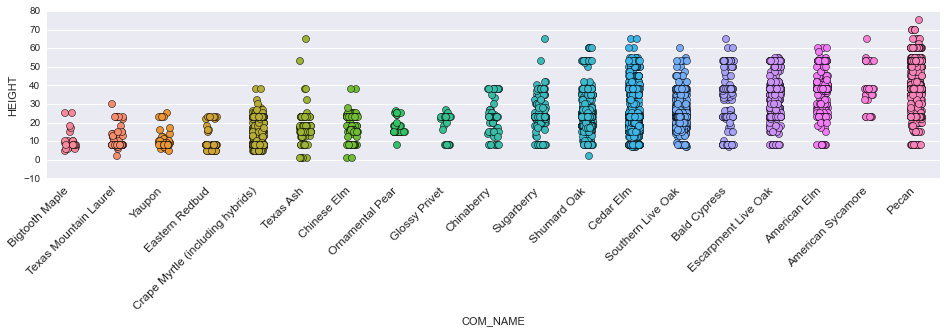

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sp = sns.stripplot(x='COM_NAME', y='HEIGHT', data=min30, jitter=0.12, order=mean_heights.index[::-1],
                  edgecolor='k', linewidth=0.5)
plt.gcf().set_size_inches((16, 3))
_ = plt.xticks(rotation=45, ha='right', fontsize=12)

In the plot above, every point is a single tree. Tree species are ordered in ascending mean height. The tallest tree species in downtown Austin, on average, is the pecan. Good old *Carya Illinoinensis*:

<a data-flickr-embed="true"  href="https://www.flickr.com/photos/0ccam/6818421287" title="Pecan Tree"><img src="https://farm8.staticflickr.com/7161/6818421287_cd6cba2629_b.jpg" width="400" alt="Pecan Tree"></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>


## To good (tree) health!

The data also contain qualitative ratings of tree condition (Good, Fair, etc.), so we can get a quick sense of how different tree species tend do in downtown Austin. I don't know how these ratings were made---and I'd be surprised if a licensed tree doctor gave each one a comprehensive physical---so we should probably take them with a grain of salt. But hey, let's not let important questions about methodology get in the way of colorful visuals.

In the plot below, we're ignoring everything but "Good", "Fair", and "Poor" ratings (the other categories collectively account for only a small proportion of trees). We sort species by proportion of trees in "Good" condition.

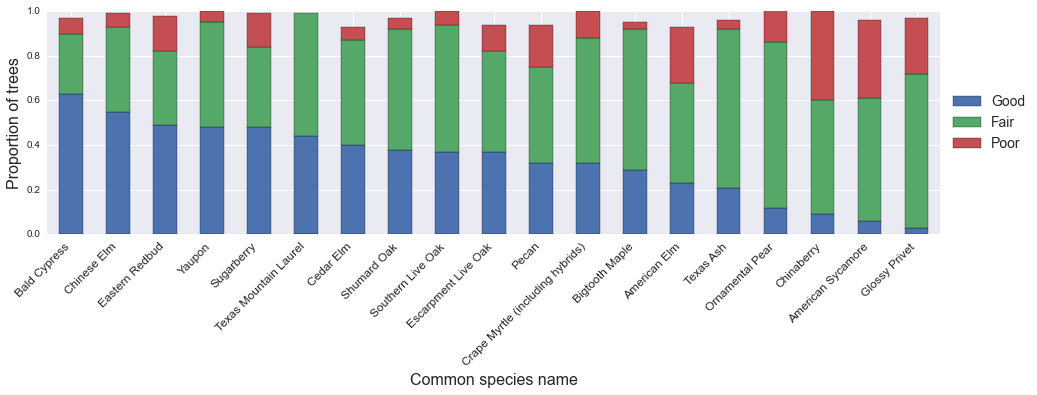

In [8]:
# Dummy code tree condition and add in the common name and height columns
conditions = pd.get_dummies(min30['CONDITION'])
conditions['species'] = min30['COM_NAME']
conditions['height'] = min30['HEIGHT']
# Group condition by species and keep only the most common conditions
mc = conditions.groupby('species').mean().apply(lambda x: x.round(2))
mc = mc[['Good', 'Fair', 'Poor']].sort('Good', ascending=False)
# Stacked bar plot
mc.plot(kind='bar', stacked=True)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
plt.gcf().set_size_inches((16, 4))
plt.xlabel('Common species name', fontsize=16)
plt.ylabel('Proportion of trees', fontsize=16)
_ = plt.ylim(0, 1)

Bald cypresses do really well downtown; glossy privets, not so much. But that's okay, because glossy privets are a terrible, no-good, [evil invasive species](http://www.texasinvasives.org/plant_database/detail.php?symbol=LILU2). So we don't mind so much if they're not terribly comfortable here.

## Mapping the trees

Okay, okay, enough with descriptive statistics. Let's get down to the business of mapping!

The first rule of mapping is, you need some spatial information in order to do it (the second rule of mapping is that someone will always yell at you for using the wrong map projection, no matter which projection you use). Unfortunately, the CSV we read in above doesn't contain latitude and longitude coordinates, so it's quite useless if we want to overlay the tree data on a map. But not to worry: the City of Austin's data dump includes a KML file that does contain latitude and longitude values (in addition to all of the same metadata contained in the CSV). We can use a bit of BeautifulSoup magic to extract all the data from the KML.

In [9]:
from bs4 import BeautifulSoup

def get_data_from_kml(filename):
    ''' Extract tree data. We use the KML file rather than
    the CSV because the former contains lat/long coords. '''
    soup = BeautifulSoup(open(filename).read(), 'lxml')
    data = []
    # Extract all tree properties for each entry
    for p in soup.find_all('placemark'):
        row = {
            'long': p.find('longitude').text,
            'lat': p.find('latitude').text
        }
        for li in p.find('description').find_all('li'):
            name, val = li.find(class_='atr-name').text, li.find(class_='atr-value').text
            row[name] = val
        data.append(row)
    return pd.DataFrame(data).convert_objects(convert_numeric=True)
    
trees = get_data_from_kml('Downtown_Tree_Inventory_2013.kml')
trees.head()

,ADDRESS,COM_NAME,CONDITION,DBH,HEIGHT,LAND_TYPE,OBJECTID,PARK_NAME,SPECIES,TREE_ID,X,Y,_SocrataID,lat,long
0,1201 RED RIVER ST,Escarpment Live Oak,Poor,27,27,Park,1,Waterloo Neighborhood Park,Quercus fusiformis,7,3116131.02598,10072645.3270,mcim-ujjp,30.273151,-97.736905
1,1201 RED RIVER ST,American Elm,Fair,22,8,Park,2,Waterloo Neighborhood Park,Ulmus americana,63,3116227.97821,10072923.9685,pt6y-32m4,30.273910,-97.736577
2,1201 RED RIVER ST,Escarpment Live Oak,Poor,34,30,Park,3,Waterloo Neighborhood Park,Quercus fusiformis,82,3116226.42670,10072723.5907,g8ct-zvxw,30.273360,-97.736597
3,1201 RED RIVER ST,Pecan,Poor,30,8,Park,4,Waterloo Neighborhood Park,Carya illinoinensis,93,3116310.15587,10072891.5405,netr-ew4u,30.273816,-97.736319
4,1201 RED RIVER ST,Southern Live Oak,Fair,20,8,Park,5,Waterloo Neighborhood Park,Quercus virginiana,94,3116359.91200,10072813.4274,uqz3-9v9w,30.273598,-97.736167


If you scroll all the way to the right in the above table, you should see new 'lat' and 'long' columns.

Now that we have geographic coordinates, we can set about the business of making beautiful maps of trees!

Okay, beautiful is a bit of a tall order; let's aim for *passable*.

In principle, we should use a map projection to transform the lat/long coordinates, but at this scale, we're unlikely to notice any distortion in the map. So we'll just plot the trees directly onto the canvas based on their raw lat/long values. I'm sure someone will still yell at us for not using a map projection (remember the second law of mapping?), but that's okay. If that someone is super concerned about the lack of an appropriate projection, they can clone this Jupyter notebook and add one to the code themselves. I'm playing my Get Out of Jail Free card on this one.

For now, we'll also dispense with any notion of adding a map underlay (we'll deal with that later). To start, we'll just plot the trees by their location, color-code them by species, and hope the result makes sense. Granted, this isn't really much of a map; it's more like a collection of semi-orderly colorful blobs. Fortunately, it turns out that sometimes semi-orderly colorful blob collections can be pretty informative.

This next chunk of code is pretty long, because we're building in a bunch of functionality we'll use again later (that's what all the elevation stuff is for). If you don't care for it, you can safely skip down to the colorful bits.

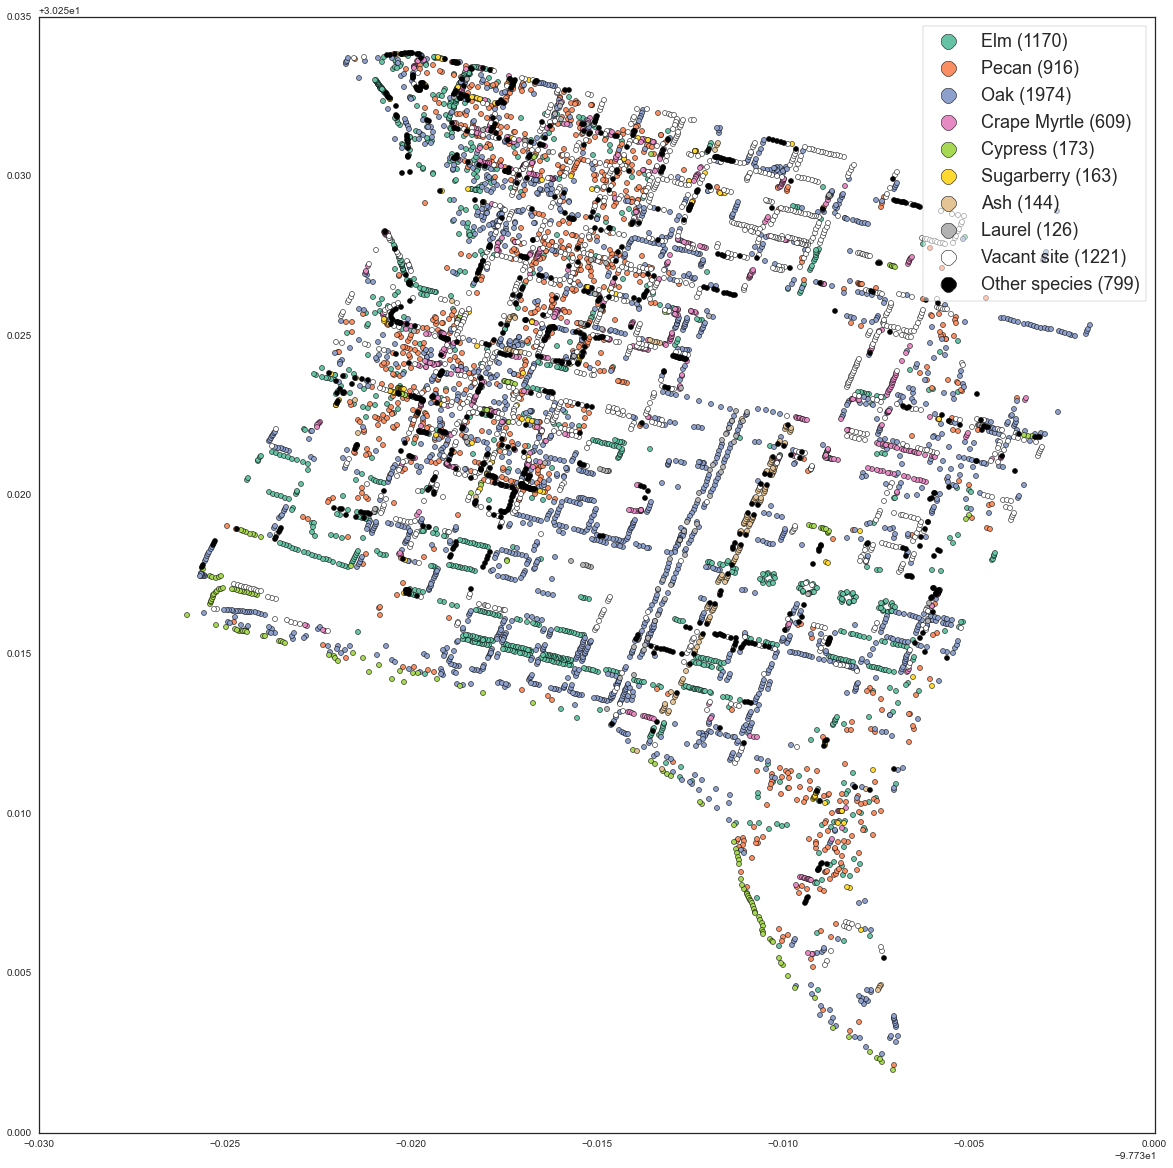

In [10]:
sns.set_style('white')

def plot_trees(groups=None, ax=None, elevation=None, height=False, ms=5, palette='Set2'):
    ''' Add a layer of trees to a plot.
    Args:
        groups: Optional list of group-defining species names (e.g., 'Pecan',
            'Oak', etc.). A regex search on the COM_NAME field will be performed
            for each string.
        ax: Optional Axes object to use. If None, a new figure is created.
        elevation: If passed, the elevation of the nearest available lat/long
            coord is used as the ground level height of each tree.
        height: If False, trees are identified with circle markers. If True,
            a 3D line with length proportional to each trees height is used.
        ms: size of marker (when height=False).
        palette: The color palette to use. Any name accepted by Seaborn.
    '''
    
    tn = trees['COM_NAME']
    unique_species = tn.unique()
    
    # Default to showing these trees...
    if groups is None:
        groups = ['Elm', 'Pecan', 'Oak', 'Crape Myrtle', 'Cypress',
                  'Sugarberry', 'Ash', 'Laurel']
    
    # Colors are great!
    n_colors = len(groups)
    colors = sns.color_palette(palette, n_colors)

    if ax is None:
        fig = plt.figure(figsize=(20, 20))
        ax = fig.add_subplot(111)

    def find_nearest(arr, values):
        ''' Find nearest match in arr for each element in values. '''
        return np.abs(np.subtract.outer(arr, values)).argmin(0)
    
    # If we're plotting elevation, we need to find the nearest coordinate
    # with valid elevation data for each tree.
    if elevation is not None:
        ny = find_nearest(elevation.columns.values, trees['long'])
        nx = find_nearest(elevation.index.values, trees['lat'])
        trees['elevation'] = elevation.values[nx, ny]
            
    used = []
    kwargs = {}
    
    def plot_layer(color, label, data=None, search=None, height_exp=2, **kwargs):
        ''' Plot a single color layer--i.e., one group of trees.
        Args:
            color: The layer color (any value understood by mpl.plot()).
            label (str): The layer label to display.
            data (DataFrame): The data for all and only the trees in the plotted layer.
            search (str): If data is None, rows will be selected from the full
                tree DataFrame if their common name includes this string.
            height_exp (float): Exponent on tree height; vary to make taller trees
                stand out more or less.
            kwargs: Optional keyword arguments passed to MPL plotting function.
        '''
        if data is None:
            data = trees[tn.str.contains(search)]
        if elevation is not None:
            kwargs['zs'] = data['elevation']
        label += ' (%d)' % len(data)
        # If we have elevation data, plot lines instead of markers. We inject NaN values
        # to prevent line segments between consecutive points from being plotted.
        if height:
            x, y, z = [], [], []
            for i in range(len(data['long'])):
                _x, _y, _z = data['long'].iloc[i], data['lat'].iloc[i], data['elevation'].iloc[i]
                x.extend([_x, _x, np.nan])
                y.extend([_y, _y, np.nan])
                # Square heights to make taller trees stand out more
                z.extend([_z, _z + (data['HEIGHT'].iloc[i]/10)**height_exp, np.nan])
            ax.plot(x, y, z, color=color, label=label, lw=2, alpha=0.7, **kwargs)
        else:
            ax.plot(data['long'], data['lat'],'o', ms=ms, mec='k', mew=0.5,
                    color=color, label=label, **kwargs)
        # Track all the trees we've already shown, so we can lump all the rest
        # under a single color.
        used.extend(list(data.index))
    
    for i, g in enumerate(groups):
        plot_layer(color=colors[i], label=g, search=g)

    # Plot vacant sites in white
    plot_layer(search='Vacant', color='white', label='Vacant site')
    
    # Lump all other trees together in black
    data = trees[~trees.index.isin(used)]
    plot_layer('black', 'Other species', data=data)

    # Add legend
    legend = ax.legend(fontsize=18, markerscale=3, frameon=True, framealpha=0.5)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(4.0)
        
plot_trees()

And just like that, we've got something that looks suspiciously like a map of downtown Austin---despite not includng any actual streets or other geographic markers. It's kind of neat to see the contrast between the more residential northwestern quadrant of downtown, where trees are scattered through people's private yards, and the grid-like arrangement in the core, where trees are found almost exclusively on sidewalks. The downtown grid itself is clearly discernible even in the absence of any geographic information. Congress Ave---which we now know to be lined with oak and laurel trees---is easy to pick out, leading from Lady Bird Lake (the southern boundary of the grid) to the capitol complex. (Interestingly, the capitol complex itself is devoid of trees in this map, presumably because it's owned and maintained by the state of Texas rather than the City of Austin. I guess we'll never know which trees are into state politics.)

The 2nd street district is lined almost entirely with Elm trees. Brazos street--which runs North/South one block east of Congress--is the only street in downtown Austin with a meaningful concentration of Ash trees. Bald Cypresses are concentrated primarily along the shoreline. And it's worth noting that there are literally hundreds of vacant planting sites scattered throughout downtown (white circles), so in the long run, the downtown tree canopy should fill out even more. As I noted above, these data are from 2013, so quite a few of these sites have actually already been filled--e.g., the blocks of Colorado Street between 3rd and 5th are now lined with new trees on both sides of the road, and so is much of 3rd street.

## Adding some depth to the analysis
You see that subheading right there? That's possibly the worst pun in a notebook full of bad puns.

Anyway, what I'm trying to say is, right now our map is kind of... two-dimensional (cue groans from the peanut gallery). Fortunately, we have this whole other third dimension we can work with. Austin is kind of a hilly place; let's see if we can make the map a bit more informative--or at least, easy to navigate--by introducing elevation data to the plot.

Here we're going to load in some data from the US Geological Survey. You can get the elevation data either by mucking around with the USGS's the interactive <a href="http://viewer.nationalmap.gov/viewer/">National Map</a> viewer for a while (which is what I did), or by being clever and going directly to <a href="https://www.sciencebase.gov/catalog/item/get/5314a1bce4b06e877c2c60f8">the source</a>. You won't find the data included in this repository because the file is pretty huge (blame the USGS for freely releasing all this amazing high-resolution data).

Anyway, the code below reads in the image file, extracts the elevation data, and then calls the plotting code we saw earlier (remember how I said we were cheating and including extra features?) to generate a perspective plot of downtown Austin, complete with all of the trees we saw before.

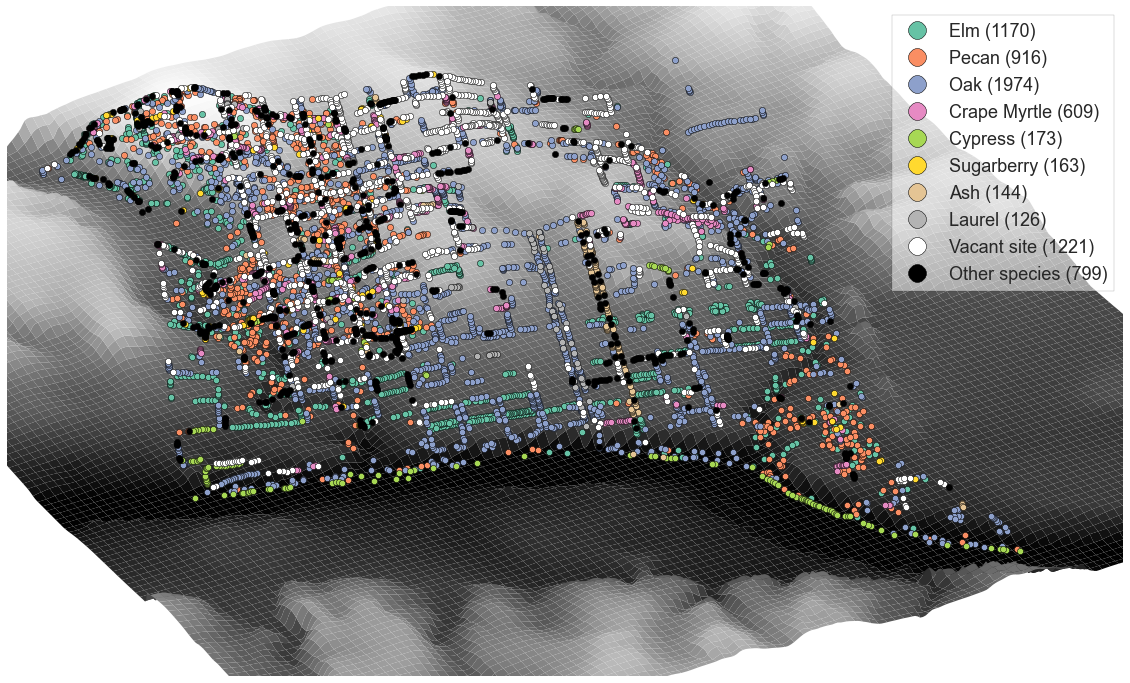

In [13]:
from osgeo import gdal
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

def extract_elevation(img_file, bbox=[30.285, 30.25, 97.76, 97.728], format='wide'):
    ''' Extract USGS elevation data from an IMG file.
    Args:
        img_file (str): name of IMG file containing elevation data for target region.
            Input should be 1/3 arc sec resolution elevation data for 1x1 degree
            with top left corner at N31W98.
        bbox (list): Definition of bounding box for tree data. First two elements
            are min/max latitude; last two elements are min/max longitude.
        format (str): If 'wide', returns a pandas DataFrame with lats in rows
            longs in columns, and elevation as the value in each cell. If 'long',
            melts the DF and returns a DataFrame where every row is a single
            coord, with lat/long in the first two columns and elevation values in
            the third column.
    '''
    geo = gdal.Open(img_file)
    elev = geo.ReadAsArray()
    n_obs = len(elev)
    bin_deg = 1./n_obs
    inds = [n_obs-int((x % 1)/bin_deg) for x in bbox]
    map = elev[inds[0]:inds[1], inds[2]:inds[3]]
    data = pd.DataFrame(map, columns=np.linspace(-bbox[2], -bbox[3], map.shape[1]),
                       index=np.linspace(bbox[0], bbox[1], map.shape[0]))
    if format=='long':
        data = data.reset_index()
        data = data.rename(columns={'index': 'lng'})
        data = pd.melt(data, id_vars='lng', var_name='lat', value_name='elevation')
    return data

def plot_perspective(elevation, groups, figsize=(20, 12), height=False, stride=3):
    elev = extract_elevation(elevation, format='wide')
    x, y = np.meshgrid(elev.columns.values, elev.index.values)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(x, y, elev.values, cmap='Greys_r', rstride=stride, cstride=stride, lw=0, vmin=None, vmax=None)
    ax.set_zlim(0, 300)
    ax.set_axis_off()
    plot_trees(groups, ax, elev, height=height, palette='Set2', ms=6)
    ax.view_init(elev=60., azim=240)
    ax.dist=5

# You'll have to download this guy from the USGS. And I'm guessing that
# when you do, it will no longer be located in my downloads directory.
# Because if it is, you need to give me my laptop back or I'm calling
# the cops.
elevation_data = '/Users/tal/Downloads/n31w098/imgn31w098_13.img'

groups = ['Elm', 'Pecan', 'Oak', 'Crape Myrtle', 'Cypress',
                  'Sugarberry', 'Ash', 'Laurel']

plot_perspective(elevation_data, groups)

And now it all becomes clear! Well, at least if you're vaguely familiar with Austin's topography. We can clearly see Lady Bird Lake as it winds its way through downtown. The two creeks (Shoal on the west and Waller on the East) are also readily visible. Other than that, this map is pretty much the same as the one above, only a bit fancier. In fact, it's so much the same that you might be wondering if maybe, just maybe, we could cram some more information into the plot without completely drowning it in an ugly mess of color and shape. I mean, we have to take advantage of that extra dimension somehow, right?

Okay, you got me. Just this one time, we can cram in a little bit of extra information. Let's add... tree height.

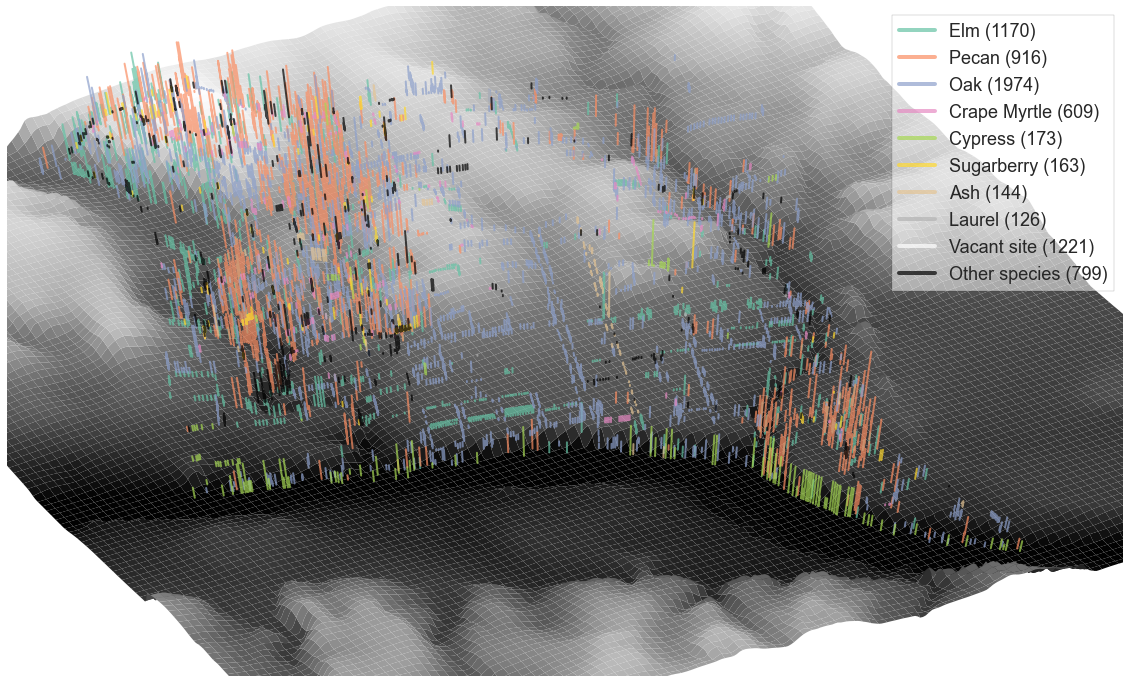

In [14]:
plot_perspective(elevation_data, groups, height=True)

Hey! Our map has pointy sticks now!

Here, each line is a single tree, with line height proportional to tree height (well, actually, to the square of tree height--we're cheating a bit in order to make the tall trees stand out more). We can clearly see that Pecan and Bald Cypress trees tend to be taller than the oaks and elms. Also, trees in the northwest quadrant of downtown seem to be taller--probably because they've been growing on private property for much longer than the city-planted trees in the core.

## The Google Maps version

By this point you're probably grumbling to yourself that no mapping exercise is complete without a dynamic, draggable, zoomable, clickable map. Not to worry; we can display all of the same information interactively in Google Maps. We'll even be able to click on any tree to get some more information about address, condition, etc. The only catch is that the Google Maps map is hellishly slow to load, because I was lazy and and decided to load all ~7,300 trees into the map at once (a better way to handle this would be to cluster trees at lower zooms and dynamically load in individual tree-level data at higher zooms).

Anyway, here's the code. Be warned: it's an ugly, ugly, mix of Python, HTML, and JavaScript.

In [23]:
html = """
<head>
<link rel="stylesheet" type="text/css" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.3.5/css/bootstrap.min.css">
<style>
body {
    width: 1000px;
    margin: 0 auto;
}

#gmap {
    border: 1px solid #333;
}
#gmap img { max-width: none; }

#legend {
    background: #FFF;
    border: 1px solid black;
    opacity: 0.9;
    padding: 10px;
    margin: 5px;
    font-size: 12px;
    width: 100px;
    font-family: Arial, sans-serif;
}

.box {
    border: 1px solid;
    height: 12px;
    width: 12px;
    margin: 0px 3px 0px 0px;
    float: left;
}
</style>
</head>
<body>
<h2>Trees of Downtown Austin</h2>
<div id="gmap" style="width: 950px; height: 600px;"></div>
<script src="https://maps.googleapis.com/maps/api/js"></script>
<script>
var map;
var infoWindow = new google.maps.InfoWindow({ content: 'Tree info' });
var trees = [];
var legend = ['<h4>Species</h4>'];
function initMap() {
  map = new google.maps.Map(document.getElementById('gmap'), {
    center: {lat: 30.273174, lng: -97.744109},
    zoom: 15
  });
"""
groups = ['Elm', 'Pecan', 'Oak', 'Myrtle', 'Cypress', 'Sugarberry', 'Ash', 'Laurel']
n_colors = len(groups)
colors = sns.color_palette('Set2', n_colors)

def add_tree_layer(group, color, opacity=1.0):
    color = '#%02x%02x%02x' % tuple([int(x*255) for x in color])
    add_html = '\nlegend.push("<p><div class=\'box\' style=\'background: {0};\'></div>{1}</p>");'.format(color, group)
    d = trees[trees['COM_NAME'].str.contains(group)]
    for j, r in d.iterrows():
        # display information in tooltip
        title = "<p><b>%s</b><br />Address: %s<br />Condition: %s<br />Height: %s feet<br />Land type: %s</p>" % (r['COM_NAME'], r['ADDRESS'], r['CONDITION'], r['HEIGHT'], r['LAND_TYPE'])
        add_html += '''
var t = new google.maps.Circle({{
    fillColor: '{0}',
    radius: 10,
    map: map,
    strokeWeight: 0.2,
    strokeColor: 'black',
    fillOpacity: {1},
    center: {{ lat: {2}, lng: {3} }}
}});
trees.push(t);
google.maps.event.addListener(t, 'click', function() {{
    infoWindow.setPosition({{ lat: {2}, lng: {3} }})
    infoWindow.setContent('{4}')
    infoWindow.open(map);
}});
'''.format(color, opacity, r['lat'], r['long'], title)
    return add_html

for i, g in enumerate(groups):
    html += add_tree_layer(g, colors[i])
    
html += add_tree_layer('Vacant', (1, 1, 1), 0.5)

html += """
var legDiv = document.createElement('div');
legDiv.id = 'legend';
legDiv.innerHTML = legend.join('');
legDiv.index = 1;
map.controls[google.maps.ControlPosition.RIGHT_BOTTOM].push(legDiv);
}
google.maps.event.addDomListener(window, 'load', initMap);
</script>
<p style="font-size: 16px; margin-top: 6px;">An interactive map of the trees in downtown Austin. Created by <a href="http://talyarkoni.org">Tal Yarkoni</a> using open data obtained from the 
<a href="https://data.austintexas.gov/">City of Austin Data Portal</a>. For more information,
including all of the code used to generate this map, see the
<a href="https://github.com/tyarkoni/open-data-flights/blob/master/downtown-trees/flight2.ipynb">Open Data Flights</a> 
repository on GitHub.</p>
</body>
"""

open('google_maps.html', 'w').write(html)

As it turns out, the HTML page this code generates is about 3 MB, and is reeallllllly slow to load. So rather than inject it directly into the notebook, we write it out as a separate file. You can [view the result interactively here](https://rawgit.com/tyarkoni/open-data-flights/master/downtown-trees/google_maps.html). For the impatient, here's a (static) glimpse of what it looks like:
<img src="google-maps-screenshot.jpg"></img>

And that's it! So ends our brief tour of downtown Austin's trees. To summarize what we've learned:

* Pecan trees are tall.
* Oaks and elm trees are all over the place.
* The City of Austin is really big on the whole "let's make all the trees on this street look the same" thing.
* Naively loading 10,000 data points into a Google Maps map is a bad idea that will cause you to not have a good time.

Okay, there was some other stuff too. But mainly I'm just happy I now know what the various trees in my neighborhood are. This way I can look all knowledgeable-like in front of my friends whenever I bitch and moan about how the oaks, elms, and pecans in this city are clearly trying to murder me in my sleep with their deadly pollen.